# Test delle ipotesi: Casi base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
np.random.seed(1304)
x = np.linspace(-3, 3, 1000)

**Ipotesi nulla $H_0 : x=0$**

**Ipotesi alternativa $H_1 : x\neq0$**

## CASO A: Genero y senza alcuna relazione con x

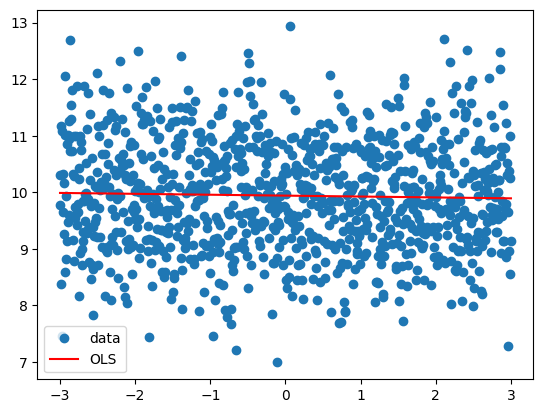

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7802
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.377
Time:                        16:04:34   Log-Likelihood:                -1406.4
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     998   BIC:                             2827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9408      0.031    318.021      0.0

In [3]:
np.random.seed(1304)
y = np.random.normal(10, 1, 1000)
X = pd.DataFrame({"x": x})
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

#Plot the data
plt.plot(X["x"], y, "o", label="data")
#Plot the regression line
plt.plot(X["x"], results.fittedvalues, "r-", label="OLS")
plt.legend(loc="best")
plt.show()
print(results.summary())

Guardando il p-value osserviamo che non c'è correlazione, infatti `P>|t|` è maggiore di `0.05`.
Un altro modo per vedere la significatività è mediante l'intervallo di confidenza: Se `0` è compreso nell'intervallo, allora il valore non è significativo.

> Dato che il p-value > 0.05, non rifiutiamo l'ipotesi nulla

## Caso B: Genero y con relazione lineare con x

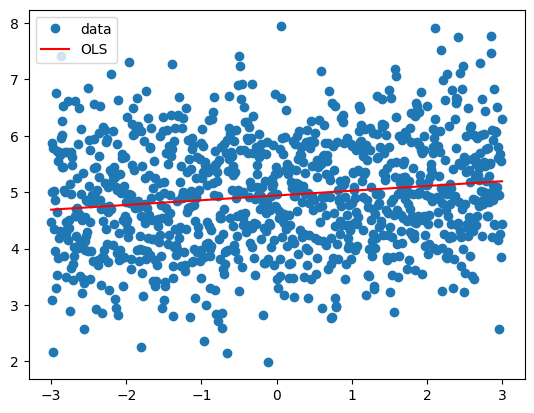

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.75
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.53e-06
Time:                        16:04:34   Log-Likelihood:                -1406.4
No. Observations:                1000   AIC:                             2817.
Df Residuals:                     998   BIC:                             2827.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9408      0.031    158.064      0.0

In [4]:
np.random.seed(1304)
y = np.random.normal(5+0.1*x, 1, 1000)
X = pd.DataFrame({"x": x})
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

#Plot the data
plt.plot(X["x"], y, "o", label="data")
#Plot the regression line
plt.plot(X["x"], results.fittedvalues, "r-", label="OLS")
plt.legend(loc="best")
plt.show()
print(results.summary())

Questa volta notiamo la significatività.

>Dato che il p-value < 0.05, rifiutiamo l'ipotesi nulla

# Caso C: Genero y con la relazione quadratica con x, ma senza effetto lineare

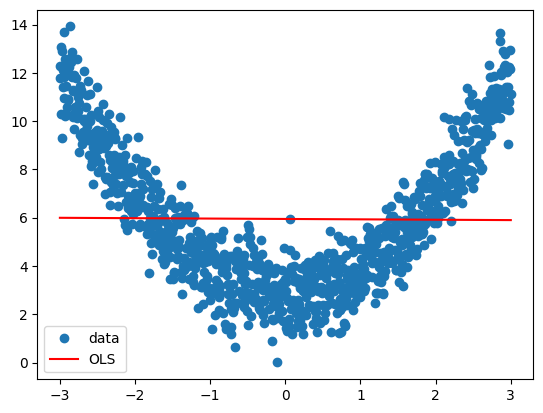

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09021
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.764
Time:                        16:04:35   Log-Likelihood:                -2485.1
No. Observations:                1000   AIC:                             4974.
Df Residuals:                     998   BIC:                             4984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9468      0.092     64.691      0.0

In [5]:
np.random.seed(1304)
y = np.random.normal(3+np.power(x,2), 1, 1000)
X = pd.DataFrame({"x": x})
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

#Plot the data
plt.plot(X["x"], y, "o", label="data")
#Plot the regression line
plt.plot(X["x"], results.fittedvalues, "r-", label="OLS")
plt.legend(loc="best")
plt.show()
print(results.summary())

Questa volta notiamo la **non** significatività.

>Dato che il p-value > 0.05, non rifiutiamo l'ipotesi nulla

# Test delle ipotesi generale

I test vengono effettuati sui coefficienti.

Possiamo avere 3 possibilità:

1. Test di significatività
2. Test composito di un sottovettore
3. Test di uguaglianza

I test di ipotesi sono definiti nel seguente modo:
$$H_0: \bold{C}\bold{\beta} = \bold{d}$$
Supponiamo di avere il seguente modello:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \varepsilon$$

**Test di significatività**: testiamo un singolo coefficiente
$$H_0: \beta_1 = 0$$

Scritto seguendo la forma generale abbiamo:
$$\begin{pmatrix}
0 & 1 & 0
\end{pmatrix}
\cdot
\begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{pmatrix} = 0
$$

>La posizione dell'elemento posto a `1` è la posizione del $\beta_i$ da testare.

**Test composito di un sottovettore**: testiamo 2 o più coefficienti contemporaneamente.

$$H_0: \beta_1 = \beta_2 = 0$$

Scritto seguendo la forma generale abbiamo:
$$\begin{pmatrix}
0 & 1 & 0 \\
0 & 0 & 1
\end{pmatrix}
\cdot
\begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
$$

**Test di uguaglianza**: testiamo se due o più coefficienti sono interscambiabili, perchè se sono uguali possono essere raggruppati.

$$H_0: \beta_1 - \beta_2 = 0$$

Scritto seguendo la forma generale abbiamo:
$$\begin{pmatrix}
0 & 1 & -1
\end{pmatrix}
\cdot
\begin{pmatrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{pmatrix} = 0
$$


Modificando $\bold{C}$ e $\bold{d}$ possiamo effettuare tutti i test che vogliamo.